## We will utilize "TCC CEDs Music Dataset" which contains metadata about songs , including their genres , artists and lyrics

In [37]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

## Eploaratory Data Analysis

Before building the recommendation system , we perform exploratory data analysis(EDA) to gain insights into the dataset.

# Distribution of songs by Genre 

We visualize the top 10 genres in the dataset to understand diversity of songs.

In [38]:
data = pd.read_csv('content/tcc_ceds_music.csv')
data.head()


,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [ ]:
## Just Random Testing Part for .csv extension files , retrieval.

# import os
# import glob


# def get_csv_files_with_glob(folder_path):

#     """ Retrieves all files with .csv extension in the given folder using glob.


#     Args:
#         folder_path : The path to the folder

#     Returns:
#         A list of strings , where each string is the full path to a CSV file. 
#     """
#     csv_files = glob.glob(os.path.join(folder_path,"*.csv"))

#     return csv_files



# def get_csv_files_with_os_walk(folder_path):
#     """
#     Retrives all files with .csv extension in the given folder using os.walk

#     Args:
#         folder_path : The path to the folder

#     Returns:
#         A list of strings , where each string is the full path to a CSV file.
    
#     """
#     csv_files = []
#     for dirpath , _ , filenames in os.walk(folder_path):
#         for filename in filenames:
#             if filename.endswith('.csv'):
#                 csv_files.append(os.path.join(dirpath, filename))

#     return csv_files

In [40]:
filenames1 = get_csv_files_with_glob('content')

filenames2 = get_csv_files_with_glob('content')


print(filenames1 , filenames2)

['content/tcc_ceds_music.csv'] ['content/tcc_ceds_music.csv']


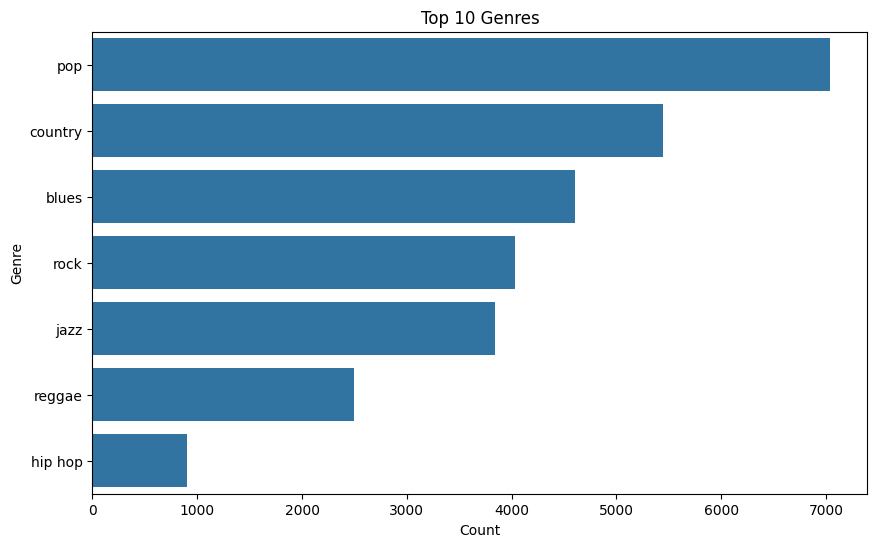

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(y='genre',data=data,
              order=data['genre'].value_counts().index[:10])
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

/var/folders/9g/wd_d_pvd58g3ljrkcr8d0_cw0000gn/T/ipykernel_7579/1030958302.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values , y=top_artists.index, palette='viridis')


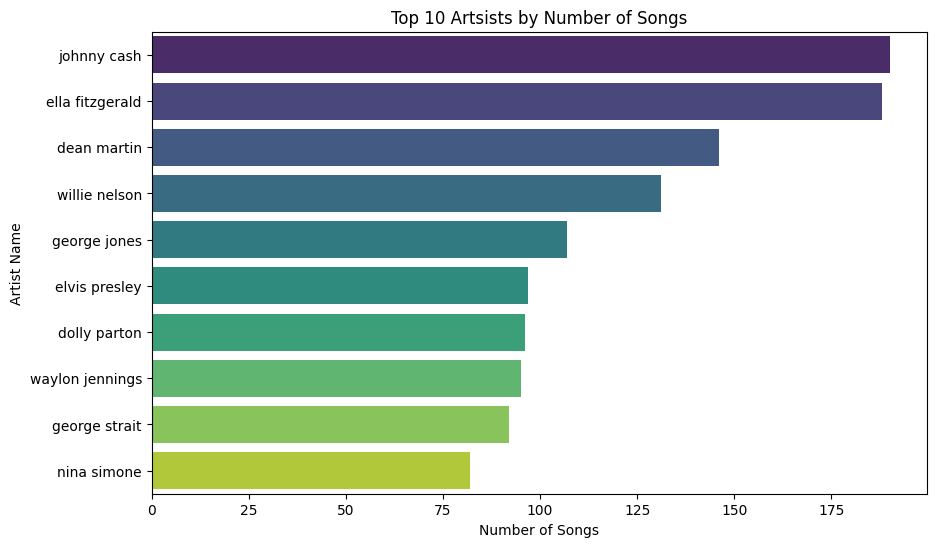

In [42]:
top_artists = data.groupby('artist_name').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_artists.values , y=top_artists.index, palette='viridis')
plt.title('Top 10 Artsists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist Name')
plt.show()

## Step 3: Preprocessing the data

To build recommendation system , we process the data by combining relevant features and converting then into numerical vectors.


Combine Features

We concatenate the genre , artist_name and track_name columns into a single feature called combine_features.


In [43]:
data['combined_features'] = (
    data["genre"].fillna('')+ ' ' +
    data['artist_name'].fillna('') + ' ' +
    data['track_name'].fillna('')
)

In [44]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['combined_features'])


cosine_sim = cosine_similarity(tfidf_matrix , tfidf_matrix)

## Compute Similarity Scores

We compute the cosine similarity between songs based on their vectorized features.

In [45]:
def get_recommendations(song_title , data , cosine_sim , top_n=10):

    # Get the index of the song that matches the title
    idx = data[data['track_name'] == song_title].index
    if len(idx) == 0:
        print("Song not found in the dataset")
        return
    
    idx = idx[0]

    print(f"idx is",idx)
    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores , key=lambda x: x[1],reverse=True)

    sim_scores = sim_scores[1:top_n+1]
    song_indices = [i[0] for i in sim_scores]
    
    recommendations = data.iloc[song_indices]
    return recommendations

## Explanation

. The function retrieves the index of the input song.

. It computes similarity scores for all songs and sorts them in descending order.

. It returns the top-N most similar songs.


# Step 4: Generate Recommendatiosn

We use the get_recommendations function to recommend songs similar to a specific input song (eg:, 'cry')



In [46]:
recommended_songs = get_recommendations('cry', data , cosine_sim, top_n=10)
print(recommended_songs[['track_name','artist_name','genre']])

idx is 2
                          track_name     artist_name  genre
56                         here am i     johnnie ray    pop
12887             keep on loving you  johnnie taylor  blues
15294              too many memories  johnnie taylor  blues
14542  there's nothing i wouldn't do  johnnie taylor  blues
14679                         lately  johnnie taylor  blues
13887                     steal away  johnnie taylor  blues
14701             don't make me late  johnnie taylor  blues
12881           baby, we've got love  johnnie taylor  blues
13247  i got to love somebody's baby  johnnie taylor  blues
12882            i need lots of love  johnnie taylor  blues


## Step 5: Visualize Recommendations

Finally , we visualize the recommeded songs using bar chart.

/var/folders/9g/wd_d_pvd58g3ljrkcr8d0_cw0000gn/T/ipykernel_7579/3950399580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='track_name',x='artist_name' ,


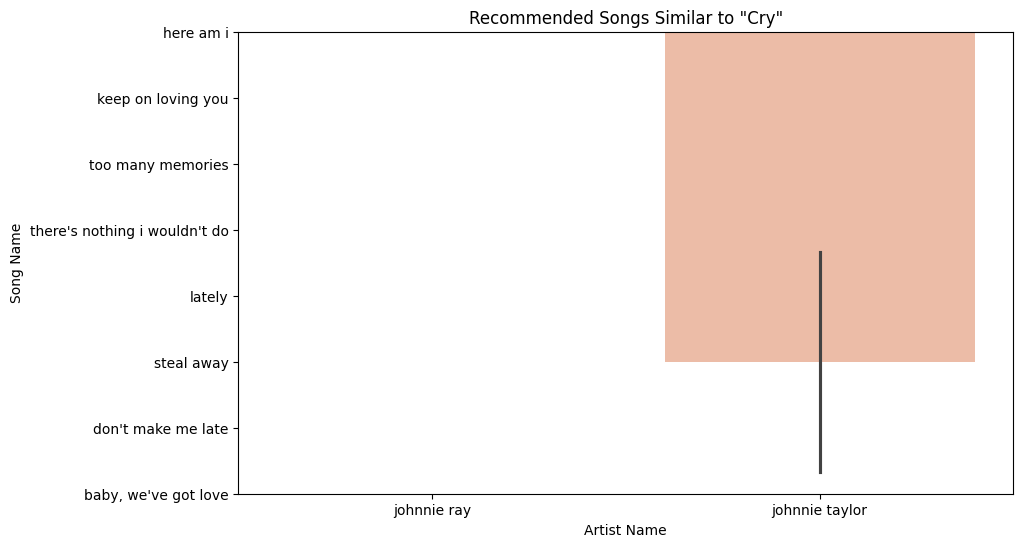

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(y='track_name',x='artist_name' , 
            data = recommended_songs , palette='coolwarm')
plt.title('Recommended Songs Similar to "Cry"')
plt.xlabel('Artist Name')
plt.ylabel('Song Name')
plt.show()